In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
import calendar
import matplotlib.dates as mdates
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [ ]:
raw_hotel = pd.read_csv('https://drive.google.com/uc?export=download&id=1mSib0mphz12I8FryFd4bNmm896EhFbm8', low_memory=False)
raw_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

| Feature Name | Description |
| --- | --- |
|**hotel** | Type of hotel |
|**is_canceled** | Value indicating if the booking was canceled (1) or not (0)|  
|**lead_time** | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date|
|**arrival_date_year** | Year of arrival date|
|**arrival_date_month** | Month of arrival date with 12 categories: “January” to “December” |
|**arrival_date_week_number**| Week number of the arrival date |
|**arrival_date_day_of_month** | Day of the month of the arrival date  |
|**stays_in_weekend_nights** | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  |
|**stays_in_weekdays_nights** | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights |
|**adults** | Number of adults  |
|**children** | Number of children |
|**babies** | Number of babies |  
|**meal** | Meal menu |
|**city** | City of origin  |
|**market_segment** | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”  |
|**distribution_channel** | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”  |
|**is_repeated_guest** | Value indicating if the booking name was from a repeated guest (1) or not (0) |  
|**previous_cancellations** | Number of previous bookings that were cancelled by the customer prior to the current booking |
|**previous_bookings_not_canceled** | Number of previous bookings not cancelled by the customer prior to the current booking |  
|**booking_changes** | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
|**deposit_type** |  Type of deposit |
|**agent** | ID of the travel agency that made the booking  |
|**company** | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons  |
|**days_in_waiting_list** | Number of days the booking was in the waiting list before it was confirmed to the customer  |
|**customer_type** | TYpe of customer |
|**adr** | Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights) |  
|**required_car_parking_spaces** | Number of car parking spaces required by the customer |
|**total_of_special_requests** | Number of special requests made by the customer (e.g. twin bed or high floor) |
|**reservation_status** |  Status of reservation |



---



---



# Data Exploration



---



---



In [ ]:
raw_hotel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
60255,City Hotel,1,277,2018,January,46,7,1,2,2,...,0,Non Refund,NaN,NaN,0,Personal,100.00,0,0,Canceled
6969,Resort Hotel,1,331,2018,September,29,14,2,8,2,...,0,No Deposit,240.0,NaN,0,Personal,135.00,0,2,Canceled
111564,City Hotel,0,193,2019,July,18,6,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,124.46,0,2,Check-Out
656,Resort Hotel,0,25,2017,September,30,24,2,5,2,...,1,No Deposit,250.0,NaN,0,Personal,115.00,0,0,Check-Out
58657,City Hotel,1,37,2018,December,42,13,0,3,1,...,0,No Deposit,56.0,NaN,0,Family,95.00,0,0,Canceled


In [ ]:
# Checking null values
null_cols = raw_hotel.columns[raw_hotel.isnull().any()]
null_val = raw_hotel[null_cols].isnull().sum().to_frame().reset_index()
null_val.columns = ['Column', 'Count']
null_val['Percent%'] = round(null_val['Count']/len(raw_hotel) * 100, 3)
null_val

,Column,Count,Percent%
0,children,4,0.003
1,city,488,0.409
2,agent,16340,13.686
3,company,112593,94.307


There are 4 columns containing null values. The company column contains 94% of null values, means this columns doesn't really give us important thing to know. Delete this column might be the best way.

In [ ]:
# Check duplicated rows
raw_hotel.duplicated().sum()

33261

Because of data type from some columns seems wrong, we can fix the data type into the correct one. But, for `children` column due to null value, we only can fix them after handling the null value which is in the next stage. `agent` and `company` contain ID number but doesn't mean its numerical calculation, so better to change the data type into object

In [ ]:
# Fix the data type (minus children column)

raw_hotel['agent'] = raw_hotel['agent'].astype(str)
raw_hotel['company'] = raw_hotel['company'].astype(str)

In [ ]:
# Categorize the features to see the distribution
num = ['lead_time', 'is_canceled', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'days_in_waiting_list', 'adr', 'total_of_special_requests', ]
cat = ['hotel','meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status', 'agent', 'company']

In [ ]:
raw_hotel[num].describe()

,lead_time,is_canceled,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,days_in_waiting_list,adr,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.370416,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,2.321149,101.831122,0.571363
std,106.863097,0.482918,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,17.594721,50.535790,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,18.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000
50%,69.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000
75%,160.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1.000000
max,737.000000,1.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,391.000000,5400.000000,5.000000


In [ ]:
raw_hotel[cat].describe()

,hotel,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,agent,company
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,5,177,8,5,3,4,3,334,353
top,City Hotel,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out,9.0,nan
freq,79330,92310,48590,56477,97870,104641,89613,75166,31961,112593




---



---



# Exploratory Data Analysis (EDA)



---



---



## Unique Value

In [ ]:
raw_hotel['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
raw_hotel['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
raw_hotel['city'].unique()

array(['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman',
       'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan,
       'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang',
       'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung',
       'Kabupaten Magelang', 'Kabupaten Sumedang', 'Kota Jakarta Timur',
       'Kabupaten Purwakarta', 'Kabupaten Kepulauan Seribu',
       'Kabupaten Belitung', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan',
       'Kota Surabaya', 'Kota Jakarta Utara', 'Kota Gorontalo',
       'Kota Jambi', 'Kota Jakarta Barat', 'Kota Bengkulu',
       'Kabupaten Bandung Barat', 'Kabupaten Bekasi', 'Kabupaten Bogor',
       'Kabupaten Ciamis', 'Kabupaten Cianjur', 'Kabupaten Cirebon',
       'Kota Cimahi', 'Kabupaten Indramayu', 'Kabupaten Karawang',
       'Kabupaten Kuningan', 'Kabupaten Majalengka', 'Kabupaten Serang',
       'Kota Pangkal Pinang', 'Kabupaten Subang', 'Kabupaten Sukabumi',
       'Kabupaten Garut', 'Kabupaten Tasikmalaya', 'Kota Bandung',
 

In [ ]:
raw_hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
raw_hotel['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
raw_hotel['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
raw_hotel['customer_type'].unique()

array(['Personal', 'Contract', 'Family', 'Bussiness'], dtype=object)

In [ ]:
raw_hotel['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

## Abnormal Value

<Axes: >

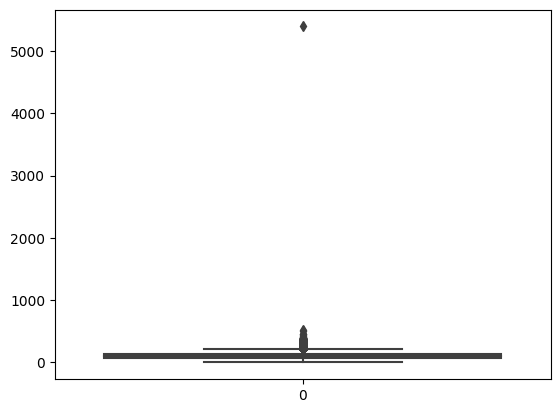

In [ ]:
# Checking adr column
sns.boxplot(raw_hotel['adr'], orient='v')

In [ ]:
# Checking data with adr is less than 0
raw_hotel[raw_hotel['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
14969,Resort Hotel,0,195,2019,May,10,5,4,6,2,...,2,No Deposit,273.0,nan,0,Family,-6.38,0,0,Check-Out


In [ ]:
# Checking data with adr is more than 5000
raw_hotel[raw_hotel['adr'] > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
48515,City Hotel,1,35,2018,May,13,25,0,1,2,...,1,Non Refund,12.0,nan,0,Personal,5400.0,0,0,Canceled


We will drop these ourliers.

In [ ]:
# Checking the 0 guest or 0 night to ensure data
# Checking data with no guest
raw_hotel['total_guests'] = raw_hotel['children'] + raw_hotel['adults'] + raw_hotel['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(raw_hotel[raw_hotel['total_guests'] == 0].shape[0], raw_hotel.shape[0]))

# Checking data with no night
raw_hotel['stay_duration'] = raw_hotel['stays_in_weekend_nights'] + raw_hotel['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(raw_hotel[raw_hotel['stay_duration'] == 0].shape[0], raw_hotel.shape[0]))

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data


These data also abnormal.



---



---



# Data Cleansing



---



---



In [ ]:
# Delete duplicated rows and noise data
hotel = raw_hotel.copy()

hotel.drop_duplicates(inplace=True)
hotel.drop(columns=['company','city'], inplace=True)

Next step is handling missing value. This dataset has 4 columns containing missing value, `children`, `city`, `agent`, and `company`.
1. Because of many missing value, we already deleted the `city` and `company` previously.
2. Missing value in `agent` will be replaced by the most frequent value that is agent with ID 9.0. This ID dominated around 30% from 334 unique value.
3. For `children`, because of the missing value only 4, we can delete this rows so the analysis would not interpretated wrong.  
4. From the statistical analysis, `adr` column has minus value (< 0) and extremely maximum value (>5000) which can be categorized as outliers, so we will drop the rows.  
5. Removing rows with 0 guest and 0 night due to abnormal value.  
6. Replace Undefined meal to 'No Meal'

In [ ]:
# Handling Missing and Unique Value

hotel['agent'].fillna(hotel['agent'].mode(), inplace=True)
hotel['meal'].replace('Undefined', 'No Meal', inplace=True)

# Delete Abnormal Value
min_adr = hotel[((hotel.adr < 0))].index
hotel = hotel.drop(min_adr)

max_adr = hotel[((hotel.adr > 5000))].index
hotel = hotel.drop(max_adr)

t_guest = hotel[((hotel.total_guests == 0))].index
hotel = hotel.drop(t_guest)

stay_dur = hotel[((hotel.stay_duration == 0))].index
hotel = hotel.drop(stay_dur)

# Removes remaining null values - children
hotel.dropna(axis=0, inplace=True)
print(f'Is still there any missing value ? {hotel.isnull().any().any()}')

Is still there any missing value ? False


In [ ]:
print(f'Original Data :' , raw_hotel.shape)
print(f'Cleaned Data :' , hotel.shape)

Original Data : (119390, 31)
Cleaned Data : (85372, 29)


In [ ]:
hotel['children'] = hotel['children'].astype('int64')
data_hotel = hotel.copy()
data_hotel.to_csv('hotel_bookings_cleaned.csv', index=False)

All clear! The dataset is ready to be analyzed.



---



---



# Data Visualization



---



---



## 1. Analyzing Monthly Hotel Bookings

There are 2 types of hotel, they are City Hotel and Resort Hotel. First, we will analyze how the trends from each hotel in period of time 2017-2019.

In [ ]:
data_hotel['hotel'].value_counts()

City Hotel      52186
Resort Hotel    33186
Name: hotel, dtype: int64

City Hotel has more reservations than Resort Hotel. Now, we'll take a look at the share of reservation status (Check Out, Canceled, No Show) in total 3 years.

In [ ]:
#rsv_hotel = data_hotel.groupby(['hotel', 'arrival_date_year', 'reservation_status'])['reservation_status'].count().reset_index(name='total_reservations')
#rsv_hotel

In [ ]:
data_hotel.groupby(['hotel','reservation_status'])['reservation_status'].count().reset_index(name='grand_total')

,hotel,reservation_status,grand_total
0,City Hotel,Canceled,15096
1,City Hotel,Check-Out,36364
2,City Hotel,No-Show,726
3,Resort Hotel,Canceled,7611
4,Resort Hotel,Check-Out,25316
5,Resort Hotel,No-Show,259


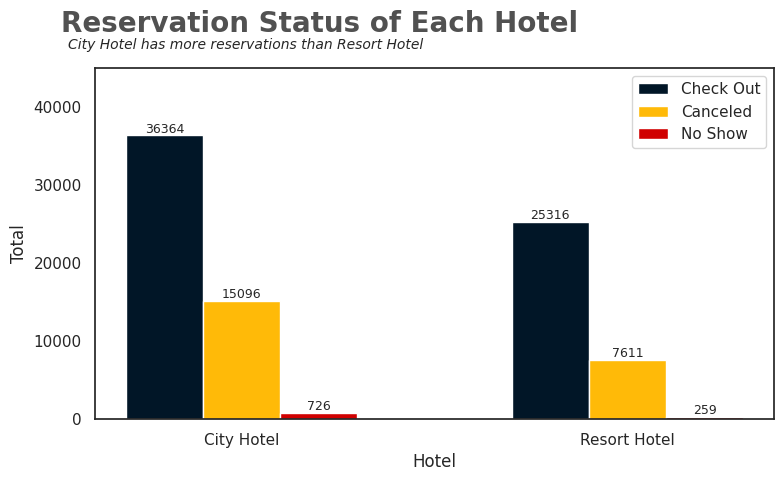

In [ ]:
checkout = (36364, 25316)
canceled = (15096, 7611)
noshow = (726, 259)
xpos = np.arange(len(checkout))
xpos

sns.set(style='white')
fig, ax = plt.subplots(1, figsize=(8,5))
barwidth = 0.2
plt.bar(xpos, checkout, color='#011627', width = barwidth, label ='Check Out')
plt.bar(xpos+0.2, canceled, color='#FFBA08', width = barwidth, label = 'Canceled')
plt.bar(xpos+0.4, noshow, color='#D00000', width = barwidth, label = 'No Show')
plt.xticks(xpos+0.2, ('City Hotel', 'Resort Hotel'))
plt.xlabel('Hotel')
plt.ylabel('Total')
plt.ylim(-50, 45000)
ax.set_title('Reservation Status of Each Hotel', x=-0.05, y=1.08, loc='left', fontweight='bold', fontsize=20, alpha=.8)
ax.text(x=-0.25, y=47500,s="City Hotel has more reservations than Resort Hotel", fontsize=10, style='italic')

for label in ax.containers:
    ax.bar_label(label, fontsize=9)
plt.legend()
plt.tight_layout()
plt.savefig('rsv_hotel.png')

Now we can see how past reservations have looked. City hotel has more reservations including more check out, more canceled, and more no-show than resort hotel. The canceled reservations in city hotel are almost half of the total checkout so need to be analyzed further to avoid this in the future.  
Next thing is to analyze the trend monthly from arrival date.

In [ ]:
# Take a look at arrival date
arv_date = data_hotel.groupby(['hotel', 'arrival_date_day_of_month', 'arrival_date_month', 'arrival_date_year'])['hotel'].count().reset_index(name='Count')
arv_date.sample(5)

,hotel,arrival_date_day_of_month,arrival_date_month,arrival_date_year,Count
1267,Resort Hotel,19,February,2017,30
1547,Resort Hotel,30,August,2019,65
589,City Hotel,23,May,2019,90
916,Resort Hotel,5,November,2018,50
1526,Resort Hotel,29,February,2017,26


Because the data is too large, we just need to check if there's wrong input of arrival date.

In [ ]:
date_cols = arv_date['arrival_date_day_of_month'].astype(str) + ' ' + \
            arv_date['arrival_date_month'] + ' ' + \
            arv_date['arrival_date_year'].astype(str)
date_cols

0            1 April 2018
1            1 April 2019
2           1 August 2018
3           1 August 2019
4         1 December 2017
              ...        
1581      31 October 2018
1582      31 October 2019
1583    31 September 2017
1584    31 September 2018
1585    31 September 2019
Length: 1586, dtype: object

In [ ]:
# New column as a checker
arv_date['arv_c_date'] = pd.to_datetime(date_cols, errors='coerce')
arv_date[arv_date['arv_c_date'].isnull()]

,hotel,arrival_date_day_of_month,arrival_date_month,arrival_date_year,Count,arv_c_date
733,City Hotel,29,February,2017,79,NaT
734,City Hotel,29,February,2018,94,NaT
757,City Hotel,30,February,2017,74,NaT
758,City Hotel,30,February,2018,92,NaT
779,City Hotel,31,February,2017,60,NaT
780,City Hotel,31,February,2018,42,NaT
790,City Hotel,31,September,2017,8,NaT
791,City Hotel,31,September,2018,57,NaT
792,City Hotel,31,September,2019,106,NaT
1526,Resort Hotel,29,February,2017,26,NaT


Some dates appear wrong, including in February, which should only have 28 days, but there are the 29th and 30th. Then in September, which only has 30 days, there is the 31st. In this case, we can fix those date into the last day of the month.

In [ ]:
# Fix the wrong date
def parse_date(dt):
    d, m, y = dt.split(' ')
    m = datetime.strptime(m, '%B').month

    # Check day
    last = calendar.monthrange(int(y), m)[-1]
    if int(d) > last:
        m += 1
        d = str(int(d) - last)
    new_date = '-'.join([y, str(m), d])
    return datetime.strptime(new_date, '%Y-%m-%d')

arv_date['arv_c_date'] = date_cols.apply(lambda x : parse_date(x))
arv_date['arrival_date_day_of_month'] = arv_date['arv_c_date'].apply(lambda x : x.strftime('%d'))
arv_date['arrival_date_month'] = arv_date['arv_c_date'].apply(lambda x : x.strftime('%B'))

# Re-check
arv_date[arv_date['arrival_date_month']=='February']

,hotel,arrival_date_day_of_month,arrival_date_month,arrival_date_year,Count,arv_c_date
6,City Hotel,01,February,2017,17,2017-02-01
7,City Hotel,01,February,2018,58,2018-02-01
32,City Hotel,02,February,2017,22,2017-02-02
33,City Hotel,02,February,2018,100,2018-02-02
58,City Hotel,03,February,2017,27,2017-02-03
...,...,...,...,...,...,...
1450,Resort Hotel,26,February,2018,46,2018-02-26
1475,Resort Hotel,27,February,2017,34,2017-02-27
1476,Resort Hotel,27,February,2018,36,2018-02-27
1501,Resort Hotel,28,February,2017,37,2017-02-28


In [ ]:
# See the correct total of reservations
rsv_hotel_month = arv_date.groupby([pd.Grouper(key='arv_c_date', freq='M'), 'hotel'])['Count'].sum().unstack()
rsv_hotel_month

hotel,City Hotel,Resort Hotel
arv_c_date,,
2017-01-31,753,831
2017-02-28,775,802
2017-03-31,213,121
2017-09-30,362,1204
2017-10-31,1055,1383
2017-11-30,1531,1132
2017-12-31,1439,1090
2018-01-31,2096,1164
2018-02-28,1736,962


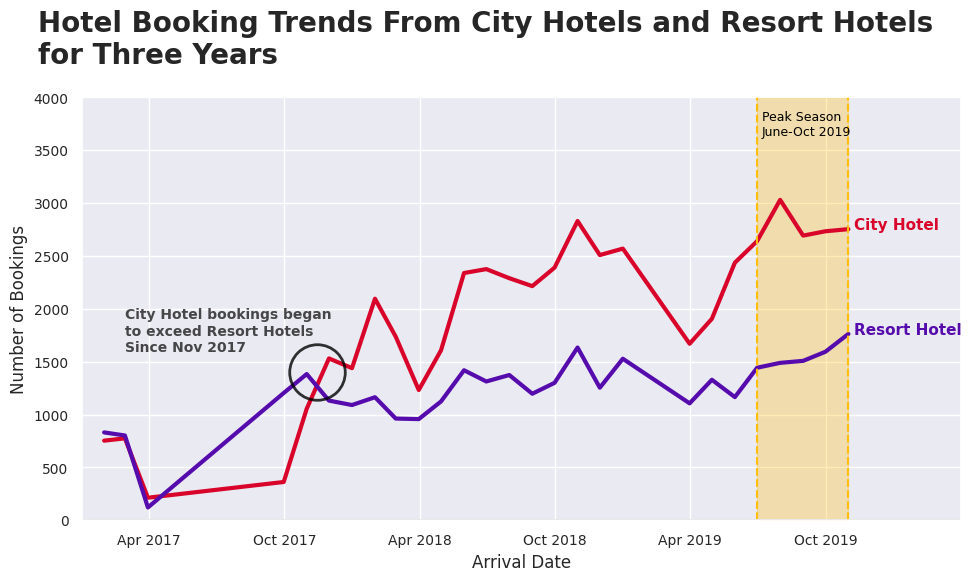

In [ ]:
# Visualize the data
sns.set(style='darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(x=rsv_hotel_month.index, y=rsv_hotel_month['City Hotel'], color='#D90429', linewidth=3)
sns.lineplot(x=rsv_hotel_month.index, y=rsv_hotel_month['Resort Hotel'], color='#560BAD', linewidth=3)

plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xlim(datetime(2017, 1, 1), datetime(2020, 3, 31))
plt.ylim(0, 4000)

# Anotation

plt.axvline(datetime(2019, 6, 30), linestyle='--', color='#FFBE0B')
plt.axvline(datetime(2019, 10, 31), linestyle='--', color='#FFBE0B')
plt.axhline(y=0, color ='black', linewidth=2, alpha=.7)
plt.text(datetime(2019, 7, 6), y=3750, s='Peak Season \nJune-Oct 2019', fontsize=9, color='black', va='center')
plt.stackplot((datetime(2019, 6, 30), datetime(2019, 10, 31)), [[4000]], color='#FFBE0B', alpha=0.3)

ax.plot(datetime(2017, 11, 14), 1400, 'o',
        ms=40, mec='black', mfc='none', mew=2, alpha=.8)
plt.text(x=datetime(2017, 2, 28), y=1600, s='City Hotel bookings began \nto exceed Resort Hotels \nSince Nov 2017',
         fontweight='bold', fontsize=10, alpha=.7, color='black')

plt.text(x=rsv_hotel_month.index[-1]+timedelta(7), y=rsv_hotel_month['City Hotel'][-1], s='City Hotel',
         fontweight='bold', fontsize=11, color='#D90429')
plt.text(x=rsv_hotel_month.index[-1]+timedelta(7), y=rsv_hotel_month['Resort Hotel'][-1], s='Resort Hotel',
         fontweight='bold', fontsize=11, color='#560BAD')
ax.set_title('Hotel Booking Trends From City Hotels and Resort Hotels\nfor Three Years',
             x=-0.05, y=1.06, loc='left', fontweight='bold', fontsize=20)

plt.tight_layout()
plt.savefig('hotel_bookings_trend.png')
plt.show()

## 2. Impact Analaysis of Stay Duration on Hotel Bookings Cancellation Rates

**Stay Duration for Each Hotel**

In [ ]:
stay_value = data_hotel['stay_duration'].unique()
print(sorted(stay_value))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 38, 42, 45, 46, 48, 56, 60, 69]


<Axes: xlabel='stay_duration', ylabel='Count'>

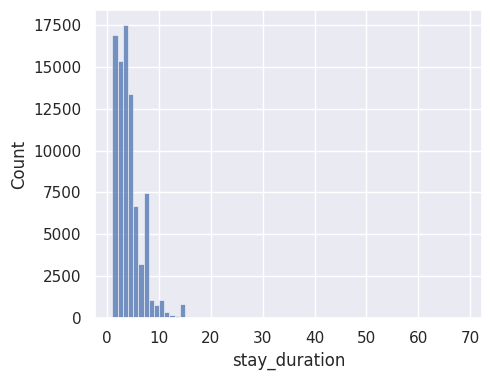

In [ ]:
# Take a look at the distribution of stay duration
plt.figure(figsize = (5,4))
sns.histplot(data=data_hotel, x='stay_duration', binwidth=1)

The stay duration starts from 1 to the longest 69 days. From the plot above, we can see the most stay duration has happened is around one to seven days (a week). The difference in stay duration seems very large, so it needs to be kept simpler by grouping the durations.

In [ ]:
def stay_duration_group(x):
    if x['stay_duration'] >= 1 and x['stay_duration'] <= 7:
        stay_duration_group = 'group 1'
    elif x['stay_duration'] >= 8 and x['stay_duration'] <= 14:
        stay_duration_group = 'group 2'
    elif x['stay_duration'] >= 15 and x['stay_duration'] <= 21:
        stay_duration_group = 'group 3'
    elif x['stay_duration'] >= 22 and x['stay_duration'] <= 30:
        stay_duration_group = 'group 4'
    else:
        stay_duration_group = 'group 5' # More than a month
    return stay_duration_group

In [ ]:
data_hotel['stay_group'] = data_hotel.apply(lambda x : stay_duration_group(x), axis = 1)
data_hotel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,stay_group
57175,City Hotel,1,55,2018,November,39,20,0,3,2,...,9.0,0,Personal,207.9,0,0,Canceled,4.0,3,group 1
17767,Resort Hotel,0,285,2017,December,42,13,2,6,2,...,nan,0,Family,44.5,0,0,Check-Out,2.0,8,group 2
105977,City Hotel,0,70,2019,April,7,15,0,4,1,...,nan,0,Family,68.0,0,0,Check-Out,1.0,4,group 1
69899,City Hotel,1,42,2019,August,23,8,0,3,2,...,9.0,0,Personal,140.0,0,2,Canceled,2.0,3,group 1
60389,City Hotel,1,28,2018,January,46,9,0,1,2,...,nan,0,Personal,201.0,0,2,Canceled,2.0,1,group 1


In [ ]:
h_stay_group = data_hotel.groupby(['hotel', 'stay_group']).agg({'stay_duration':'count'}).reset_index().rename(columns = {'stay_duration' : 'Counts'})
h_stay_group

,hotel,stay_group,Counts
0,City Hotel,group 1,51032
1,City Hotel,group 2,1009
2,City Hotel,group 3,100
3,City Hotel,group 4,42
4,City Hotel,group 5,3
5,Resort Hotel,group 1,29523
6,Resort Hotel,group 2,3449
7,Resort Hotel,group 3,134
8,Resort Hotel,group 4,63
9,Resort Hotel,group 5,17


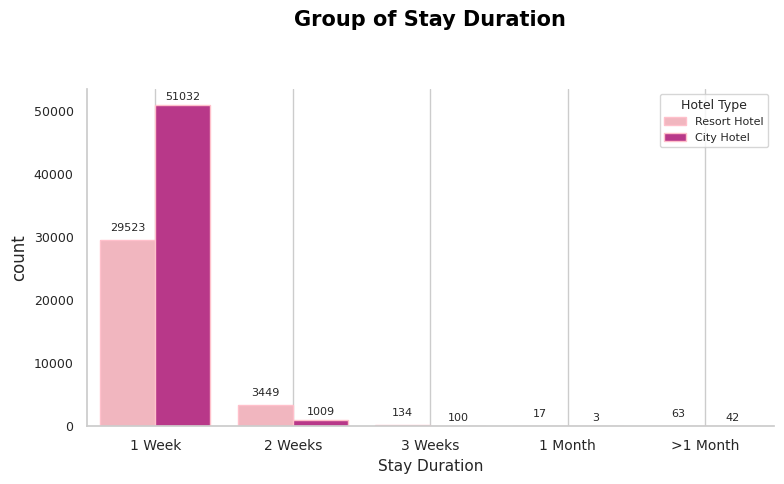

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Group of Stay Duration", fontsize=15, color='black', weight='bold', pad=45)
sns.countplot(x='stay_group', data=data_hotel, hue='hotel', edgecolor= 'pink', palette='RdPu')

plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=9, prop={'size':8})
plt.xlabel('Stay Duration', fontsize=11)
plt.xticks(range(0,5,1), labels=['1 Week', '2 Weeks', '3 Weeks', '1 Month', '>1 Month'], fontsize=10)

plt.bar_label(ax.containers[0], padding=5, fontsize=8)
plt.bar_label(ax.containers[1], padding=2, fontsize=8)

sns.despine()
plt.tight_layout()
plt.savefig('grup_stayduration.png')

**The Canceled Bookings**

In [ ]:
# Ratio of canceled booking
data_hotel['is_canceled'] = data_hotel['is_canceled'].replace({1:'Canceled', 0:'Not Canceled'})
canceled = data_hotel.groupby('is_canceled')['hotel'].agg('count').reset_index().rename(columns = {'hotel' : 'count'})
canceled

,is_canceled,count
0,Canceled,23692
1,Not Canceled,61680


In [ ]:
cancel_rate= data_hotel.groupby(['hotel', 'stay_group', 'is_canceled']).agg({'stay_duration':'count'}).reset_index().rename(columns = {'stay_duration' : 'c_days'})
sum = cancel_rate.groupby(['hotel', 'stay_group']).agg({'c_days':'sum'}).reset_index().rename(columns = {'c_days' : 'total_days'})

cancel_rate = cancel_rate.merge(sum, on=['hotel', 'stay_group'])
cancel_rate['cancel_rate'] = round((cancel_rate['c_days']/cancel_rate['total_days'])*100, 2)
cancel_rate

,hotel,stay_group,is_canceled,c_days,total_days,cancel_rate
0,City Hotel,group 1,Canceled,15187,51032,29.76
1,City Hotel,group 1,Not Canceled,35845,51032,70.24
2,City Hotel,group 2,Canceled,523,1009,51.83
3,City Hotel,group 2,Not Canceled,486,1009,48.17
4,City Hotel,group 3,Canceled,73,100,73.00
5,City Hotel,group 3,Not Canceled,27,100,27.00
6,City Hotel,group 4,Canceled,38,42,90.48
7,City Hotel,group 4,Not Canceled,4,42,9.52
8,City Hotel,group 5,Canceled,1,3,33.33
9,City Hotel,group 5,Not Canceled,2,3,66.67


In [ ]:
# Filter only the canceled booking
hotel_cancel = cancel_rate[cancel_rate['is_canceled']=='Canceled'].sort_values('stay_group')
hotel_cancel_pivot = hotel_cancel.pivot_table(index=['hotel', 'stay_group'], columns='is_canceled', values='c_days').reset_index()
hotel_cancel_pivot['cancel_rate'] = cancel_rate['cancel_rate']
hotel_cancel_pivot

is_canceled,hotel,stay_group,Canceled,cancel_rate
0,City Hotel,group 1,15187,29.76
1,City Hotel,group 2,523,70.24
2,City Hotel,group 3,73,51.83
3,City Hotel,group 4,38,48.17
4,City Hotel,group 5,1,73.00
5,Resort Hotel,group 1,6858,27.00
6,Resort Hotel,group 2,939,90.48
7,Resort Hotel,group 3,47,9.52
8,Resort Hotel,group 4,23,33.33
9,Resort Hotel,group 5,3,66.67


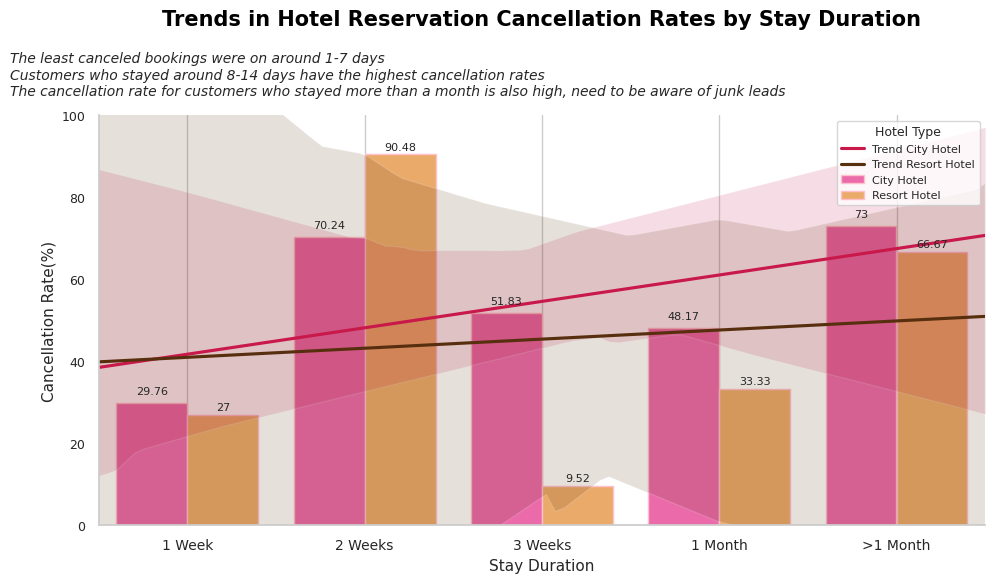

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Trends in Hotel Reservation Cancellation Rates by Stay Duration", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1, y=105, s="The least canceled bookings were on around 1-7 days \nCustomers who stayed around 8-14 days have the highest cancellation rates \nThe cancellation rate for customers who stayed more than a month is also high, need to be aware of junk leads", fontsize=10, fontstyle='italic')
sns.barplot(x='stay_group', y='cancel_rate', data=hotel_cancel_pivot, hue='hotel', edgecolor= 'pink', palette='spring')

sns.regplot(x=np.arange(0, len(hotel_cancel_pivot[hotel_cancel_pivot['hotel'] == 'City Hotel'])), y='cancel_rate', color='#C9184A',
            data=hotel_cancel_pivot[hotel_cancel_pivot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(hotel_cancel_pivot[hotel_cancel_pivot['hotel'] == 'Resort Hotel'])), y='cancel_rate', color='#582F0E',
            data=hotel_cancel_pivot[hotel_cancel_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=9, prop={'size':8})
plt.xlabel('Stay Duration', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)
plt.xticks(range(0,5,1), labels=['1 Week', '2 Weeks', '3 Weeks', '1 Month', '>1 Month'], fontsize=10)

plt.bar_label(ax.containers[0], padding=5, fontsize=8)
plt.bar_label(ax.containers[1], padding=2, fontsize=8)

sns.despine()
plt.tight_layout()
plt.savefig('cancelation_rate.png')

## 3. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

**See the Lead Time Range**

In [ ]:
data_hotel['lead_time'].value_counts()

0      5633
1      3128
2      1890
3      1683
4      1538
       ... 
410       1
605       1
400       1
626       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [ ]:
data_hotel['lead_time'].value_counts().to_frame().sort_index(ascending=True).head(60).rename(columns = {'lead_time' : 'Count'})

,Count
0,5633
1,3128
2,1890
3,1683
4,1538
5,1402
6,1275
7,1165
8,1007
9,884


In [ ]:
data_hotel.query('lead_time >=365').lead_time.value_counts()

386    39
383    24
468    20
423    17
542    15
       ..
410     1
605     1
435     1
626     1
463     1
Name: lead_time, Length: 113, dtype: int64

<Axes: xlabel='lead_time', ylabel='Count'>

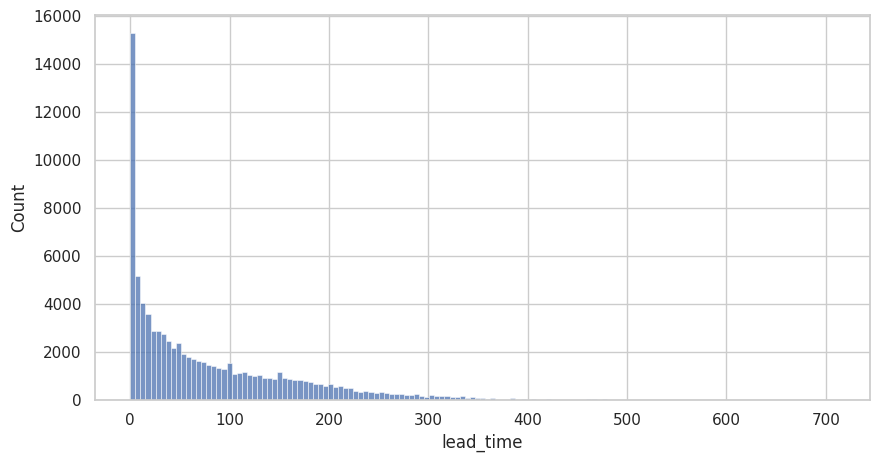

In [ ]:
# Take a look at the distribution of lead time
plt.figure(figsize = (10,5))
sns.histplot(data=data_hotel, x='lead_time')

As we can see from the analysis, the lead time range is way too large from 1 day to 2 years. Well, the 2 year lead-time seems quite nonsense and the customer counts are also few so we can group them as one group. Now, for a lead time of under a year, the most frequent is around 1 week which reaches thousands of customers.
So, we can group the lead time based on frequency and duration of lead time as follows :   
a. 1-week (1-8 days)  
b. 2-3 weeks  (9-20 days)  
c. 1-month (21-31 days)  
d. 2 months   
e. 3-4 months  
f. 5-6 months  
g. 7-9 months   
h. 1 year (10-12 months)   
i. >1 year

In [ ]:
def lead_time_group(x):
    if x['lead_time'] >= 0 and x['lead_time'] <= 8:
        lead_time_group = '1 Week'
    elif x['lead_time'] >= 9 and x['lead_time'] <= 20:
        lead_time_group = '2-3 Weeks'
    elif x['lead_time'] >= 21 and x['lead_time'] <= 31:
        lead_time_group = '1 Month'
    elif x['lead_time'] >= 32 and x['lead_time'] <= 60:
        lead_time_group = '2 Months'
    elif x['lead_time'] >= 61 and x['lead_time'] <= 120:
        lead_time_group = '3-4 Months'
    elif x['lead_time'] >= 121 and x['lead_time'] <= 180:
        lead_time_group = '5-6 Months'
    elif x['lead_time'] >= 181 and x['lead_time'] <= 270:
        lead_time_group = '7-9 Months'
    elif x['lead_time'] >= 271 and x['lead_time'] <= 365:
        lead_time_group = '1 Year'
    else:
        lead_time_group = '>1 Year' # More than a month
    return lead_time_group

data_hotel['lead_time_group'] = data_hotel.apply(lambda x : lead_time_group(x), axis = 1)

In [ ]:
h_lead_group = data_hotel.groupby(['hotel', 'lead_time_group']).agg({'lead_time':'count'}).reset_index().rename(columns = {'lead_time' : 'Counts'})
h_lead_group

,hotel,lead_time_group,Counts
0,City Hotel,1 Month,4009
1,City Hotel,1 Week,10210
2,City Hotel,1 Year,1355
3,City Hotel,2 Months,8335
4,City Hotel,2-3 Weeks,6094
5,City Hotel,3-4 Months,10872
6,City Hotel,5-6 Months,6621
7,City Hotel,7-9 Months,4336
8,City Hotel,>1 Year,354
9,Resort Hotel,1 Month,2301


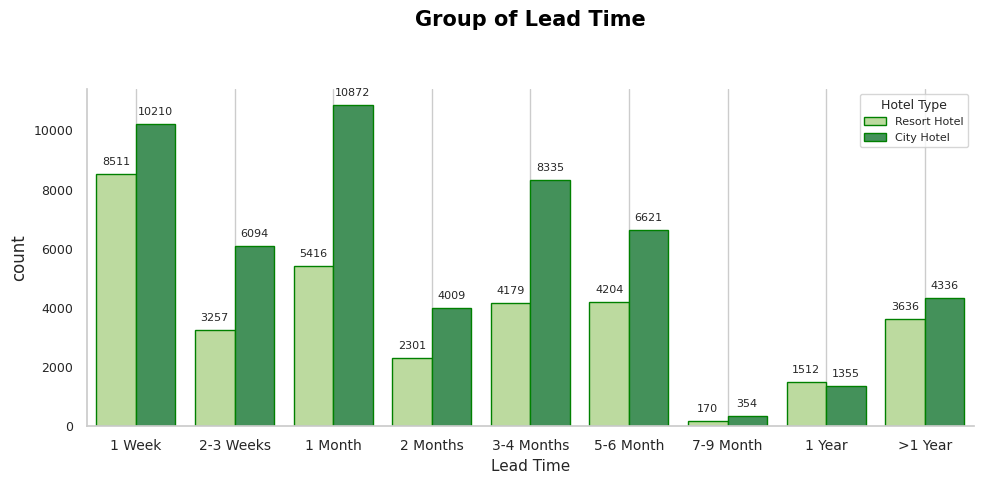

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Group of Lead Time", fontsize=15, color='black', weight='bold', pad=45)
sns.countplot(x='lead_time_group', data=data_hotel, hue='hotel', edgecolor= 'green', palette='YlGn')

plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=9, prop={'size':8})
plt.xlabel('Lead Time', fontsize=11)
plt.xticks(range(0,9,1), labels=['1 Week', '2-3 Weeks', '1 Month', '2 Months', '3-4 Months', '5-6 Month', '7-9 Month', '1 Year', '>1 Year'], fontsize=10)

plt.bar_label(ax.containers[0], padding=5, fontsize=8)
plt.bar_label(ax.containers[1], padding=5, fontsize=8)

sns.despine()
plt.tight_layout()
plt.savefig('grup_leadtime.png')

In [ ]:
cancel_rate2= data_hotel.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'lead_time':'count'}).reset_index().rename(columns = {'lead_time' : 'c_lead'})
sum = cancel_rate2.groupby(['hotel', 'lead_time_group']).agg({'c_lead':'sum'}).reset_index().rename(columns = {'c_lead' : 'total_leadtime'})

cancel_rate2 = cancel_rate2.merge(sum, on=['hotel', 'lead_time_group'])
cancel_rate2['cancel_rate_lead'] = round((cancel_rate2['c_lead']/cancel_rate2['total_leadtime'])*100, 2)
cancel_rate2

,hotel,lead_time_group,is_canceled,c_lead,total_leadtime,cancel_rate_lead
0,City Hotel,1 Month,Canceled,1287,4009,32.10
1,City Hotel,1 Month,Not Canceled,2722,4009,67.90
2,City Hotel,1 Week,Canceled,1148,10210,11.24
3,City Hotel,1 Week,Not Canceled,9062,10210,88.76
4,City Hotel,1 Year,Canceled,756,1355,55.79
5,City Hotel,1 Year,Not Canceled,599,1355,44.21
6,City Hotel,2 Months,Canceled,2762,8335,33.14
7,City Hotel,2 Months,Not Canceled,5573,8335,66.86
8,City Hotel,2-3 Weeks,Canceled,1609,6094,26.40
9,City Hotel,2-3 Weeks,Not Canceled,4485,6094,73.60


In [ ]:
# Filter only the canceled booking
hotel_cancel2 = cancel_rate2[cancel_rate2['is_canceled']=='Canceled'].sort_values('lead_time_group')
hotel_cancel_pivot2 = hotel_cancel2.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='c_lead').reset_index()
hotel_cancel_pivot2['cancel_rate'] = cancel_rate2['cancel_rate_lead']
hotel_cancel_pivot2

is_canceled,hotel,lead_time_group,Canceled,cancel_rate
0,City Hotel,1 Month,1287,32.10
1,City Hotel,1 Week,1148,67.90
2,City Hotel,1 Year,756,11.24
3,City Hotel,2 Months,2762,88.76
4,City Hotel,2-3 Weeks,1609,55.79
5,City Hotel,3-4 Months,3772,44.21
6,City Hotel,5-6 Months,2482,33.14
7,City Hotel,7-9 Months,1819,66.86
8,City Hotel,>1 Year,187,26.40
9,Resort Hotel,1 Month,569,73.60


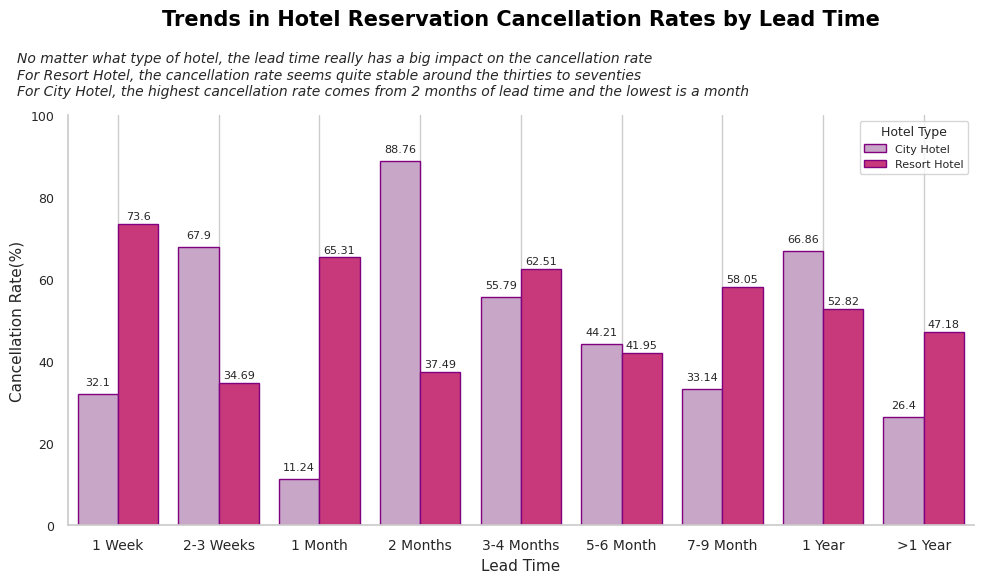

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Trends in Hotel Reservation Cancellation Rates by Lead Time", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1, y=105, s="No matter what type of hotel, the lead time really has a big impact on the cancellation rate \nFor Resort Hotel, the cancellation rate seems quite stable around the thirties to seventies \nFor City Hotel, the highest cancellation rate comes from 2 months of lead time and the lowest is a month", fontsize=10, fontstyle='italic')
sns.barplot(x='lead_time_group', y='cancel_rate', data=hotel_cancel_pivot2, hue='hotel', edgecolor= 'purple', palette='PuRd')

plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=9, prop={'size':8})
plt.xlabel('Lead Time', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)
plt.xticks(range(0,9,1), labels=['1 Week', '2-3 Weeks', '1 Month', '2 Months', '3-4 Months', '5-6 Month', '7-9 Month', '1 Year', '>1 Year'], fontsize=10)

plt.bar_label(ax.containers[0], padding=5, fontsize=8)
plt.bar_label(ax.containers[1], padding=2, fontsize=8)

sns.despine()
plt.tight_layout()
plt.savefig('cancel_rate_leadtime.png')